In [88]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

import tensorflow as tf

import qgrid

# 부동산 개념

In [89]:
# 부동산 개념

In [90]:
df=pd.read_csv('c:/temp/HPI_SEOUL.csv',encoding='CP949')
df.head()

,YYM1,CITY,CITY_CODE,GU_NAME,GU_CODE2,API_TT0,BaseRate,MoRate,FREQ,A_PSUM,...,LTV,DTI,MV_APT,JAEGO,BUNYANG,N_BUNYANG,IND_INDEX,JTP,LOAN_T,MON
0,200603,서울특별시,11,종로중구,1111,75.245608,4.00,5.46,71,2.559029,...,42.912677,93.255607,4.891421,110,0,277,109.907,48.372,104.381241,3
1,200606,서울특별시,11,종로중구,1111,81.009183,4.25,5.48,58,1.774481,...,43.944172,94.827586,4.891421,0,0,277,99.469,47.454,107.564252,6
2,200609,서울특별시,11,종로중구,1111,81.208640,4.50,5.77,90,2.898839,...,44.425621,94.000000,4.891421,0,0,14,123.203,47.670,110.666410,9
3,200612,서울특별시,11,종로중구,1111,88.068940,4.50,5.88,99,3.181162,...,50.340131,95.151515,4.891421,0,136,6,128.718,43.811,101.843742,12
4,200703,서울특별시,11,종로중구,1111,86.507762,4.50,6.20,68,1.955622,...,50.951451,48.890836,6.083816,0,112,0,110.893,42.987,107.877226,3


In [91]:
# LTV: Loan to value : 집값 대비 부채
# DTI: Debt to income ratio : 소득 대비 부채가 몇퍼센트인지
# DSR: ...
# 가장 최근 규제가 무엇인지

# 텐서 연산

In [92]:
# tensorflow

In [93]:
# 텐서 연산

In [94]:
# 텐서는 constant, variable로 가져올 수 있다.
a=tf.constant(12)
a

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [95]:
b=tf.constant([1,2,3])
b

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [96]:
# b는 벡터, a는 스칼라가 된다
# shape=(3,): 행의 갯수가 3개라는 뜻

In [97]:
#.ndim: 텐서에서 차원을 알려줌
a.ndim

0

In [98]:
b.ndim

1

In [99]:
# a 0차원, b 1차원

In [100]:
#.shape: 텐서에서 차원을 알려줌
print(a.shape,b.shape)

() (3,)


In [101]:
# b는 3개의 행으로 구성된 벡터

In [102]:
c=tf.constant([[1,2,3],[4,5,6]])
c

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [103]:
# shape=(2,3): 행렬의 dimension이 2x3이라는 뜻 가로 2 세로3

In [104]:
print(c.ndim,c.shape)

2 (2, 3)


In [105]:
tf.constant([2,3]) # 2개의 값이 있는 1차원의 텐서 구조라는 뜻

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 3])>

In [106]:
# 3차원의 텐서구조 만들기
d=tf.constant([[[1,2,3],[4,5,6],[7,8,9]]])
d

<tf.Tensor: shape=(1, 3, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])>

In [107]:
print(d.ndim,d.shape)

3 (1, 3, 3)


In [108]:
# TensorShape([1, 3, 3])
# 뒤에 3,3: 행의 갯수, 열 갯수
# 앞에 1: depth, 행렬의 층
# 3x3 행렬이 하나 있다는 뜻

In [109]:
a=tf.constant(np.arange(1,13)) # np.arange: 1부터 12까지 연속적 숫자 , 벡터임
a.ndim

1

In [110]:
a

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])>

In [111]:
# reshape: 다른 텐서구조로 바꾸자
# 2x6구조로 바꾸자
b=tf.reshape(a,[2,6])
b

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])>

In [112]:
# a를 3차원으로 바꿔보자
# 2x3 행렬을 겹겹이(2층) 쌓아보자
c=tf.reshape(a,[2,2,3])
c.ndim

3

In [113]:
c

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])>

In [114]:
# 깊이가 2인 2x3 행렬

In [115]:
# 0529 part2

In [116]:
# tensor 연산

In [117]:
x=tf.constant([1,2,3,4,5,6],shape=[2,3])
y=tf.constant([1,2,3,4,5,6],shape=[2,3])

In [118]:
# 텐서 뺄셈 ( element 끼리의 차이다 )
tf.math.subtract(x,y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]])>

In [119]:
# 텐서 덧셈 ( element 끼리의 합이다 )
tf.math.add(x,y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [120]:
# 텐서 곱셈 ( element 끼리의 곱이다 )
tf.math.multiply(x,y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [121]:
# 비교: 행렬 곱셈 .matmul
y1=tf.transpose(y)
tf.matmul(x,y1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]])>

# 텐서 미분

In [122]:
# 텐서 미분

In [123]:
# 미분.. x가 움직일 수 있는 여지 있음 -> x를 Variable로 정의
x=tf.Variable(2.0)

# 미분 파트
with tf.GradientTape() as t:
    y=x**3
    dy_dx=t.gradient(y,x) # 미분해라
print(dy_dx)

tf.Tensor(12.0, shape=(), dtype=float32)


In [124]:
# 미분한 값 : 12 로 나옴

In [125]:
# 미지수가 두개인  경우 텐서 미분
w1=tf.Variable(1.0) # 1.0에서 시작
w2=tf.Variable(1.0) # 1.0에서 시작

with tf.GradientTape() as t:
    y=3*(w1**2)+2*w1*w2
    grad=t.gradient(y,[w1,w2])
print(grad)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>, <tf.Tensor: shape=(), dtype=float32, numpy=2.0>]


In [126]:
# 미분값: numpy=8.0, numpy=2.0

In [127]:
# ML을 이용한 회귀분석 원리

In [128]:
x_data=[1,2,3,4,5]
W=tf.Variable(2.0)
b=tf.Variable(0.5)

hypothesis=W*x_data+b
print(hypothesis)

tf.Tensor([ 2.5  4.5  6.5  8.5 10.5], shape=(5,), dtype=float32)


In [129]:
# 2.5  4.5  6.5  8.5 10.5: 이게 알아낸 가설의 값
# 이 가설의 값과, y값이 얼마나 가까운지 측정하는게 cost function

In [130]:
# 여기까지가 0529
# 다음날짜부터 하면됨

In [131]:
#0603

In [132]:
x_data=[1,2,3,4,5]
y_data=[1,2,3,4,5]
W=tf.Variable(2.0)
b=tf.Variable(0.5)

hypothesis=W*x_data+b
print(hypothesis)

# cost function 정의
cost=tf.reduce_mean(tf.square(hypothesis-y_data))
print(cost)

tf.Tensor([ 2.5  4.5  6.5  8.5 10.5], shape=(5,), dtype=float32)
tf.Tensor(14.25, shape=(), dtype=float32)


In [133]:
# 초기값에서 나온 hypothesis 값 = 회귀직선의 값
hypothesis

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)>

In [134]:
# cost=14.25=((2.5-1)**2+ () + .... )/5
cost.numpy()

14.25

In [135]:
# 경사하강법

# 초기값 랜덤으로 주기
tf.random.set_seed(0)
W=tf.Variable(tf.random.normal([1]), name='weight') # [1]: random.normal에서 하나를 끄집어내
b=tf.Variable(tf.random.normal([1]), name='bias')
learning_rate=tf.Variable(0.01)

# 1001번 반복하도록 한다
for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis=W*x_data+b
        cost=tf.reduce_mean(tf.square(hypothesis-y_data))
    W_grad, b_grad=tape.gradient(cost,[W,b])
    W.assign_sub(learning_rate*W_grad) # _sub: 빼준다, 이 라인이 그 알파써서 W 옮기는 식 쓴거임
    b.assign_sub(learning_rate*b_grad)
    if i%200==0: # 1000번 반복 중에 너무 많으니까 200번 마다 보여줘라
        print(cost.numpy(),W.numpy(),b.numpy())

7.282724 [1.3346161] [1.0148789]
0.034686986 [0.8794935] [0.43506676]
0.008950316 [0.9387867] [0.2209997]
0.0023094572 [0.9689056] [0.11226072]
0.0005959122 [0.984205] [0.05702474]
0.00015376188 [0.9919767] [0.02896672]


# 머신러닝 이용한 주택가격(지수) 추정
- ex. API_TT0: 100을 기준으로 생각하며됨, '주택가격지수'
- 분기마다 측정한 가격지수임. yym1 보셈
- BaseRate: '기준금리' -> 모기지금리가 결ㅈㅇ되고 -> 주택가격도 결정되니까
- IND_INDEX: industry index, 경기 보는것, 오르면 호경기
- LTV: 집 최대 몇퍼까지 빚낼 수 있는지
- DTI: 소득대비 빚낼 수 있는 정도
- FREQ: 3개월간 주택거래량

In [136]:
df=pd.read_csv('c:/temp/HPI_SEOUL.csv',encoding='CP949')
df1=df[['API_TT0','GU_CODE2','BaseRate','IND_INDEX','LTV','DTI','FREQ']]
df2=df1.copy()

df2['BaseRate1']=df2.groupby('GU_CODE2')['BaseRate'].shift(1)
df2['IND_INDEX1']=df2.groupby('GU_CODE2')['IND_INDEX'].shift(1)
df2['LTV2']=df2.groupby('GU_CODE2')['LTV'].shift(2)
df2['DTI2']=df2.groupby('GU_CODE2')['DTI'].shift(2)
df3=df2.dropna() # shift 하다보면 결측치 생길 수 밖에 없음

# way 1: ols
housing_model=ols('API_TT0 ~ BaseRate1+IND_INDEX1+LTV2+DTI2',data=df3).fit()
print(housing_model.summary())

# 해석
# BaseRate1     -2.9000: 금리가 높아지면 주택가격이 떨어진다. 라는 뜻
# IND_INDEX1     0.1311 : 경기가 좋아지면 주택가격도 높아진다
# LTV2           0.3556 : LTV 커지면 주택가격 높아진다
# DTI2          -0.0526 : DTI 커지면 주택가격 낮아진다

                            OLS Regression Results                            
Dep. Variable:                API_TT0   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          3.75e-108
Time:                        11:29:14   Log-Likelihood:                -3856.6
No. Observations:                1104   AIC:                             7723.
Df Residuals:                    1099   BIC:                             7748.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.1081      3.594     20.065      0.0

In [137]:
# ols 말고 경사하강법 가지고도 해보자

# 전처리 1
df=pd.read_csv('c:/temp/HPI_SEOUL.csv',encoding='CP949')
df1=df[['API_TT0','GU_CODE2','BaseRate','IND_INDEX','LTV','DTI','FREQ']]
df2=df1.copy()

df2['BaseRate1']=df2.groupby('GU_CODE2')['BaseRate'].shift(1)
df2['IND_INDEX1']=df2.groupby('GU_CODE2')['IND_INDEX'].shift(1)
df2['LTV2']=df2.groupby('GU_CODE2')['LTV'].shift(2)
df2['DTI2']=df2.groupby('GU_CODE2')['DTI'].shift(2)
df3=df2.dropna() # shift 하다보면 결측치 생길 수 밖에 없음

# 전처리 2 : 데이터타입 변경
# ols는 데이터프레임 그대로 쓰지만, ml은 array로 바꿔서 써야함: .to_numpy()
# tensor type을 'float32로 바꿔야함'
X=df3[['BaseRate1','IND_INDEX1','LTV2','DTI2']].to_numpy()
y=df3[['API_TT0']].to_numpy()
X=X.astype('float32')
y=y.astype('float32')

# 경사하강법 (텐서 미분 준비)
# X.shape # (1104,4) 로 나옴 : 1104개의 행, x변수가 4개로 구성됨
k=X.shape[1] # k=4라고 정의한 것

# 경사하강법 - 초기값 주기
tf.random.set_seed(0)
W=tf.Variable(tf.random.normal([k,1]), name='weight') # [k,1]: x변수가 4개 이니까
b=tf.Variable(tf.random.normal([1]), name='bias')
learning_rate=tf.Variable(0.000001) # 값이 안나오면 learning rate= alpha 를 더 낮게 줘보자

# 1001번 반복하도록 한다
for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis=tf.matmul(X,W)+b 
        #X변수가 4개임. 행렬곱임. : tf.matmul(X,W) 로 써야함. 행렬곱이라 dimension이 맞아야 해서 () 안에 X가 먼저 나오는 거임 
        cost=tf.reduce_mean(tf.square(hypothesis-y))
    W_grad, b_grad=tape.gradient(cost,[W,b])
    W.assign_sub(learning_rate*W_grad) # _sub: 빼준다, 이 라인이 그 알파써서 W 옮기는 식 쓴거임
    b.assign_sub(learning_rate*b_grad)
    if i%200==0: # 1000번 반복 중에 너무 많으니까 200번 마다 보여줘라
        print(cost.numpy(),W.numpy(),b.numpy())

19553.852 [[ 1.5117962 ]
 [ 0.45172164]
 [-0.40336663]
 [-1.0178057 ]] [1.067156]
300.92145 [[ 1.526857  ]
 [ 1.1557647 ]
 [ 0.03515402]
 [-0.49247092]] [1.0742552]
273.9708 [[ 1.5225036 ]
 [ 1.1118581 ]
 [ 0.05381156]
 [-0.43691325]] [1.0742317]
251.48212 [[ 1.5182948 ]
 [ 1.0709859 ]
 [ 0.07251053]
 [-0.3873814 ]] [1.0742235]
232.63147 [[ 1.5142334 ]
 [ 1.0332146 ]
 [ 0.09138675]
 [-0.34304821]] [1.0742265]
216.7551 [[ 1.5103104 ]
 [ 0.99825734]
 [ 0.11037003]
 [-0.30338386]] [1.0742503]


In [138]:
# ols 말고 경사하강법 가지고도 해보자 ver2
# x변수 여러개

# 전처리 1
df=pd.read_csv('c:/temp/HPI_SEOUL.csv',encoding='CP949')
df1=df[['API_TT0','GU_CODE2','BaseRate','IND_INDEX','LTV','DTI','FREQ']]
df2=df1.copy()

df2['BaseRate1']=df2.groupby('GU_CODE2')['BaseRate'].shift(1)
df2['IND_INDEX1']=df2.groupby('GU_CODE2')['IND_INDEX'].shift(1)
df2['LTV2']=df2.groupby('GU_CODE2')['LTV'].shift(2)
df2['DTI2']=df2.groupby('GU_CODE2')['DTI'].shift(2)
df3=df2.dropna() # shift 하다보면 결측치 생길 수 밖에 없음

# 전처리 2 : 데이터타입 변경
# ols는 데이터프레임 그대로 쓰지만, ml은 array로 바꿔서 써야함: .to_numpy()
# tensor type을 'float32로 바꿔야함'
X=df3[['BaseRate1','IND_INDEX1','LTV2','DTI2']].to_numpy()
y=df3[['API_TT0']].to_numpy()
X=X.astype('float32')
y=y.astype('float32')

# 경사하강법 (텐서 미분 준비)
# X.shape # (1104,4) 로 나옴 : 1104개의 행, x변수가 4개로 구성됨
k=X.shape[1] # x변수 숫자만 큼 k 생성 # k=4라고 정의한 것

# 경사하강법 - 초기값 주기
tf.random.set_seed(0)
W=tf.Variable(tf.random.normal([k,1]), name='weight') # [k,1]: x변수가 4개 이니까
b=tf.Variable(tf.random.normal([1]), name='bias')
learning_rate=tf.Variable(0.000001) # 값이 안나오면 learning rate= alpha 를 더 낮게 줘보자
loss=[]

# 1001번 반복하도록 한다
for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis=tf.matmul(X,W)+b 
        cost=tf.reduce_mean(tf.square(hypothesis-y))
        loss.append(cost.numpy()) # cost function의 값을 loss에 모은다. 나중에 그래프
    # 경사 찾기 위해 미분
    W_grad, b_grad=tape.gradient(cost,[W,b])
    # 경사 update
    W.assign_sub(learning_rate*W_grad) # _sub: 빼준다, 이 라인이 그 알파써서 W 옮기는 식 쓴거임
    b.assign_sub(learning_rate*b_grad)
    
    if i%100==0: # 1000번 반복 중에 너무 많으니까 100번 마다 보여줘라
        print(cost.numpy(),W.numpy().flatten(),b.numpy())

19553.852 [ 1.5117962   0.45172164 -0.40336663 -1.0178057 ] [1.067156]
326.22324 [ 1.5286672   1.1626481   0.01674775 -0.5327681 ] [1.0741175]
300.92145 [ 1.526857    1.1557647   0.03515402 -0.49247092] [1.0742552]
286.8283 [ 1.5246658   1.133547    0.04454836 -0.46381575] [1.0742437]
273.9708 [ 1.5225036   1.1118581   0.05381156 -0.43691325] [1.0742317]
262.22458 [ 1.52038     1.0910152   0.06313424 -0.41146207] [1.0742235]
251.48212 [ 1.5182948   1.0709859   0.07251053 -0.3873814 ] [1.0742235]
241.64679 [ 1.5162463   1.0517311   0.08193109 -0.3645994 ] [1.0742235]
232.63147 [ 1.5142334   1.0332146   0.09138675 -0.34304821] [1.0742265]
224.35777 [ 1.5122548   1.015401    0.10086902 -0.3226634 ] [1.0742384]
216.7551 [ 1.5103104   0.99825734  0.11037003 -0.30338386] [1.0742503]


In [139]:
# 맨 윗줄은 초기값
# 그 아래부터 100번째 결과값, 200번째 결과값, 300번째 결과값, ... 등
# 220.06773 [-0.48506594 -0.10185054  1.255872    0.5248685 ] [1.2058413]
# cost function 값 (계속 minimize 되고 있다) / base rate의 효과 / 경기 효과 / ltv / dti / 상수항 bias 의 챋ㄹ
# cost func 많이 줄어들다가 끝에는 적게 줄어들고 있다

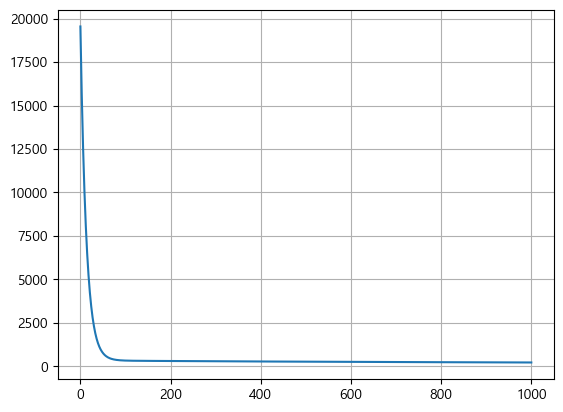

In [140]:
# cost function 줄어드는 모양을 그래프로 그려보자
# loss는 array 구조였으니, data frame으로 바꿔야 한다.
loss_data=pd.Series(loss)
plt.plot(loss_data)
plt.grid()
plt.show()

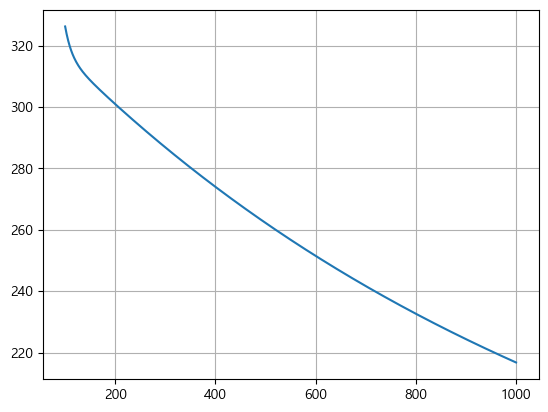

In [141]:
# 100 ~ 1000번 만 잘라서 그리자
loss_data1=loss_data.loc[100:1000]
plt.plot(loss_data1)
plt.grid()
plt.show()

In [142]:
X

array([[  4.25    ,  99.469   ,  42.912678,  93.25561 ],
       [  4.5     , 123.203   ,  43.94417 ,  94.82758 ],
       [  4.5     , 128.718   ,  44.42562 ,  94.      ],
       ...,
       [  1.25    , 113.7     ,  70.      ,  63.611317],
       [  1.25    ,  98.4     ,  70.      ,  63.602882],
       [  1.25    , 129.      ,  70.      ,  63.611485]], dtype=float32)

In [143]:
# Q: 두번째 가로의 예측값이 주어졌을 때 y hat이 얼마냐?
#        [  4.5     , 123.203   ,  43.94417 ,  94.82758 ],
second_row=X[1,:]
second_row

array([  4.5    , 123.203  ,  43.94417,  94.82758], dtype=float32)

In [144]:
predicted_y_ML=tf.matmul([second_row],W)+b
# 위에 loop 1000번 돌려서 W,랑 b값 나와있기 때문에, 여기서 W,b는 자동으로 그 중에 제일 마지막 값임
predicted_y_ML

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[106.9399]], dtype=float32)>

In [145]:
# 86.723: 예측 결과

In [146]:
# X 두번째 row 일때 실제 y 값
y[1,:]

array([88.06894], dtype=float32)

In [147]:
# 예측값과 실제값 차이남

In [148]:
# ols 쓸 때는?
# # seond row에 대한 y의 예측값을 계산해라 ols
housing_model=ols('API_TT0 ~ BaseRate1+IND_INDEX1+LTV2+DTI2',data=df3).fit()
second_row_ols=df3.iloc[1]
second_row_ols

API_TT0         88.068940
GU_CODE2      1111.000000
BaseRate         4.500000
IND_INDEX      128.718000
LTV             50.340131
DTI             95.151515
FREQ            99.000000
BaseRate1        4.500000
IND_INDEX1     123.203000
LTV2            43.944172
DTI2            94.827586
Name: 3, dtype: float64

In [149]:
# second row ols y 실제값 : API_TT0         88.068940

In [150]:
predicted_y_ols=housing_model.predict(second_row_ols)
predicted_y_ols

3    88.716887
dtype: float64

In [151]:
# second row ols y 예측값 : 88.716887

In [152]:
# 0610

# y가 이산형 종속변수일때 ML추정
## 이항종속변수 모형
- 종속변수가 0 또는 1의 값을 가진다
- 어떤 변수가 0또는 1의 값을 가질 때 이 변수의 평균은 이 변수가 1의 값을 가질 확률과 동일하다
## 로짓모형 logit model
- 범위를 맞춰주기 위해 사용
- 승산 = p/(1-p) = 어떤 사건이 일어나지 않을 확률 대비 일어날 확률
- 승산은 0~무한대의 범위를 가진다
- 알파, 베타 햇 추정가능하면 -> p 값도 계산할 수 있다
- 이떄 p 함수를 로지스틱 함수, 시그모이드 함수라고 한다
- 로지스틱 함수는 선형이 아니라서 최소제곱법이 아니라, '최대우도추정(Maximum Lilihood Estimation)을 사용해서 베타를 추정한다
- 최대우도추정: 전통적 계량경제학에서 쓰던 거다


In [153]:
df=pd.read_excel('c:/temp/exam_pass.xlsx')
df.head()
# 이항종속변수가 y 변수임을 확인한다

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [154]:
# 상수항 변수 만들자.
# alpha +beta*x니까, alpha *1이라서 '1' 상수항을 만든것
df['const']=1
df.head(10)

,hours,pass,const
0,0.50,0,1
1,0.75,0,1
2,1.00,0,1
3,1.25,0,1
4,1.50,0,1
5,1.75,0,1
6,1.75,1,1
7,2.00,0,1
8,2.25,1,1
9,2.50,0,1


In [155]:
# y: pass, x: const, hours
# 최대우도추정이라는 방법을 사용한다 MLE
logit=sm.Logit(endog=df['pass'],exog=df[['const','hours']]).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.4208
Time:                        11:29:17   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.

In [156]:
# hours coef: 1.5046
# 해석 : 공부시간 많을수록 [로그승산이 증가한다.] = [pr(y=1)일 확률이 증가한다]

In [157]:
# 로짓모형에서의 예측 prediction - 직접 계산

# Q  공부시간이 1시간이면 합격할 확률
# alpha=-4.077, beta=1.504
alpha=-4.077
beta=1.504
z=alpha+beta*1
pr_1=1/(1+np.exp(-z))
print(pr_1)

0.07089643911688731


In [158]:
# 공부시간이 1시간이면 합격할 확률: 7%

In [159]:
# 로짓모형 요약

# 불러오기
df=pd.read_excel('c:/temp/exam_pass.xlsx')

# 데이터 전처리 1: 상수항 변수 만들기
# alpha +beta*x니까, alpha *1이라서 '1' 상수항을 만든것
df['const']=1

# 바로 추정
# y: pass, x: const, hours
# 최대우도추정이라는 방법을 사용한다 MLE
logit=sm.Logit(endog=df['pass'],exog=df[['const','hours']]).fit()
print(logit.summary())
# 결과
# hours coef: 1.5046
# 해석 : 공부시간 많을수록 [로그승산이 증가한다.] = [pr(y=1)일 확률이 증가한다]

# 예측
alpha=logit.params[0]
beta=logit.params[1]
z=alpha+beta*1
pr_1=1/(1+np.exp(-z))
print(pr_1)

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.4208
Time:                        11:29:17   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.

## 로짓모형에서 예측

In [160]:
# 로짓모형에서의 예측 prediction - 코드 쓰기
alpha=logit.params[0]
beta=logit.params[1]
z=alpha+beta*1
pr_1=1/(1+np.exp(-z))
print(pr_1)

0.07089195989968797


In [161]:
# sigmoid 함수를 이용해 공부를 1~5시간까지 했을 때 합격할 확률을 계산해보자
n=5 # 1~5시간 이니까
total=np.zeros((n,2)) # nx2 비어있는 행렬을 만든다

for i in range(5): # i는 0부터 4까지, i=0~4
    k=i+1 # k = 1 ~ 5
    z=alpha+beta*k
    prob=1/(1+np.exp(-z))
    total[i-1][0]=k # 값을 채워 넣는 과정 : 0번째 칼럼에 k 넣는다 ..??
    total[i-1][1]=prob #첫번째 칼럼에 prob넣는다
total

array([[2.        , 0.25570318],
       [3.        , 0.60735865],
       [4.        , 0.8744475 ],
       [5.        , 0.96909707],
       [1.        , 0.07089196]])

In [162]:
# 해석
# 2. , 0.25570318] : 공부하는 시간이 2시간이면, 합격확률 25%
# 합격확률이 가장 크게 증가하는 공부시간 변화는 : 2->3

In [163]:
# 위에 결과를 data frame으로 변환해서 그림을 그린다
df1=pd.DataFrame(data=total, columns=['hours','prob'])
df1.sort_values(by=['hours'], inplace=True) # 순서를 hours에 맞게, 그니까 1부터 5까지 순서대로 바ㄱ꿔라 # 왜 안돼??
df1.head()

,hours,prob
4,1.0,0.070892
0,2.0,0.255703
1,3.0,0.607359
2,4.0,0.874448
3,5.0,0.969097


<function matplotlib.pyplot.show(close=None, block=None)>

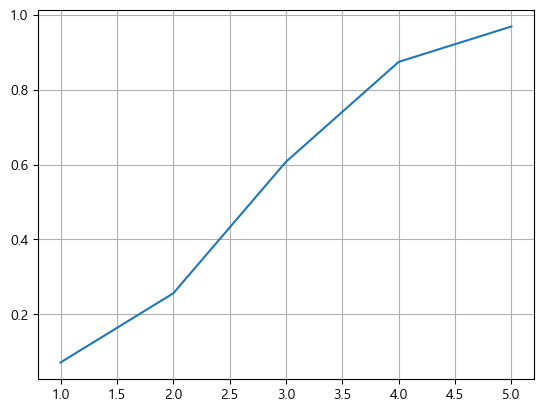

In [164]:
x=df1['hours']
y=df1['prob']
plt.plot(x,y)
plt.grid()
plt.show

In [165]:
# 0612

# ML을 써서 binary종속변수 회귀분석

## 시그모이드 함수 정의

In [166]:
# 시그모이드 함수 정의
def sigmoid(z):
    return 1/(1+np.exp(-z)) # 이 값은 무조건 0~1의 값이 나오게 된다
sigmoid(1)

0.7310585786300049

In [167]:
# p=0.73 = 73%

## 불황 0/ 호황 1 예측

In [168]:
# y가 범주형일 때 ML -> 경사하강법으로 예측하기, using sigmoid

# 불러오기
df=pd.read_csv('c:/temp/MACRO_Binary.csv')

# 데이터 전처리 1
x_data=df[['REALGDP','REALCONS','INV']]
y_data=df['TARGET1']

# 데이터 전처리 2 : ML 방식은 tensor flow 에서 사용해야 한다. 
# data frame -> numpy array 형식으로 바꿔야 한다.
x_data=x_data.to_numpy()
y_data=y_data.to_numpy()

# 데이터 전처리 3: 변수들 간 범위 맞춰 준다. 최소0~최대1
x_data_norm=MinMaxScaler().fit_transform(x_data)

# 데이터 전처리 4: 'float32'로 바꿔야 tf에서 사용 가능
x_data_norm=x_data_norm.astype('float32')
y_data=y_data.astype('float32')

# 경사하강법 적용
k=x_data_norm.shape[1]
tf.random.set_seed(1234)
learning_rate=tf.Variable(0.0001)
W=tf.Variable(tf.random.normal((k,1),name='Weignt'))
b=tf.Variable(tf.random.normal([1]),name='bias')
# 초기값 보기: print(W.numpy(),b.numpy()) 
# 10000번 실행한다
for i in range(10000+1):
    with tf.GradientTape() as tape:
        hypothesis=tf.sigmoid(tf.matmul(x_data_norm,W)+b) # tensor flow 내에 내장된 sigmoid 함수 들어가 있다. hypothesis=H(x)
        cost=-tf.reduce_mean(y_data*tf.math.log(hypothesis)+(1-y_data)*tf.math.log(1-hypothesis))
        W_grad, b_grad=tape.gradient(cost,[W,b])
        # W, b를 경사하강법에 의해 update 한다
        W.assign_sub(learning_rate*W_grad)
        b.assign_sub(learning_rate*b_grad)
        # 다른 부분은 다 같고, hypothesis, cost만 잘 정의하면 됨
    
    # 결과보기
    if i%1000==0:
        print(i,cost.numpy(),W.numpy().flatten(),b.numpy())

0 1.1952106 [ 0.8369028 -0.734328   1.0402688] [1.146763]
1000 1.1535413 [ 0.80871063 -0.7641665   1.0150895 ] [1.1037824]
2000 1.114245 [ 0.78132886 -0.7931322   0.99062204] [1.0620484]
3000 1.077331 [ 0.75478685 -0.82119447  0.9668943 ] [1.0216016]
4000 1.0427855 [ 0.7291073  -0.8483294   0.94392633] [0.9824767]
5000 1.0105796 [ 0.7043105  -0.8745164   0.92173505] [0.9447015]
6000 0.9806656 [ 0.68041027 -0.8997411   0.9003336 ] [0.9082961]
7000 0.9529786 [ 0.6574155 -0.9239948  0.8797309] [0.87327206]
8000 0.9274401 [ 0.6353296  -0.94727397  0.8599291 ] [0.83963346]
9000 0.9039601 [ 0.6141515  -0.96958023  0.8409295 ] [0.80737776]
10000 0.8824377 [ 0.5938753 -0.990921   0.8227258] [0.77649426]


In [169]:
# 1000번 단위로 결과 나옴
# 10000 0.7506217 [ 0.4368408 -1.1554717  0.6811289] [0.53703636] : 요게 원하는 결과
# 0.4368408 : 소득이 증가할 수록 경기가 호황일 가능성이 크다
# -1.1554717  : 소비 증가율이 높을 수록 경ㄱ 호황 가능성 작다
# 0.6811289 : 투자 증가율이 높을 수록 호황 가능성 높다
# RealGDP 증가율이 높아질수록 y=1(호황)일 가능성이 증가한다.
# RealCons 증가율이 높아질수록 y=1(호황)일 가능성이 감소한다.
# INV 증가율이 높아질수록 y=1(호황)일 가능성이 증가한다.